# Atividade Prática II - Parte 2

* Alunos: Giovanni Martins de Sá Júnior(2017001850) e João Vitor Gato de Araújo (2017089090)
* Disciplina: Sistemas Nebulosos
* Professor: Cristiano Leite de Castro


####**1.** Ler o Capítulo 4 do livro texto: Jyh-Shing Roger Jang and Chuen-Tsai Sun. 1996. Neuro-Fuzzy and Soft Computing: A Computational Approach to Learning and Machine Intelligence.

####**2.** Seja a função y = cosseno(x), para x definido no intervalo de [−π/2, 3π/2], conforme ilustra a Figura 2. Pede-se:

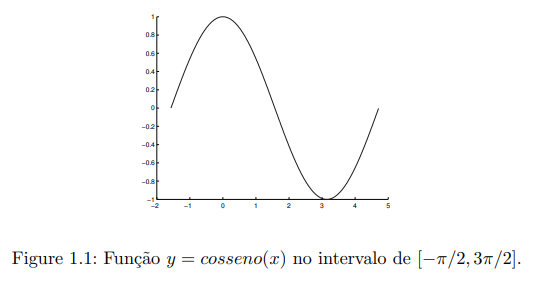

####**a.** Empregue o mecanismo o mecanismo de inferência de Sugeno com consequentes de ordem 1 (linear) e obtenha uma expressão analítica para aproximar esta função.

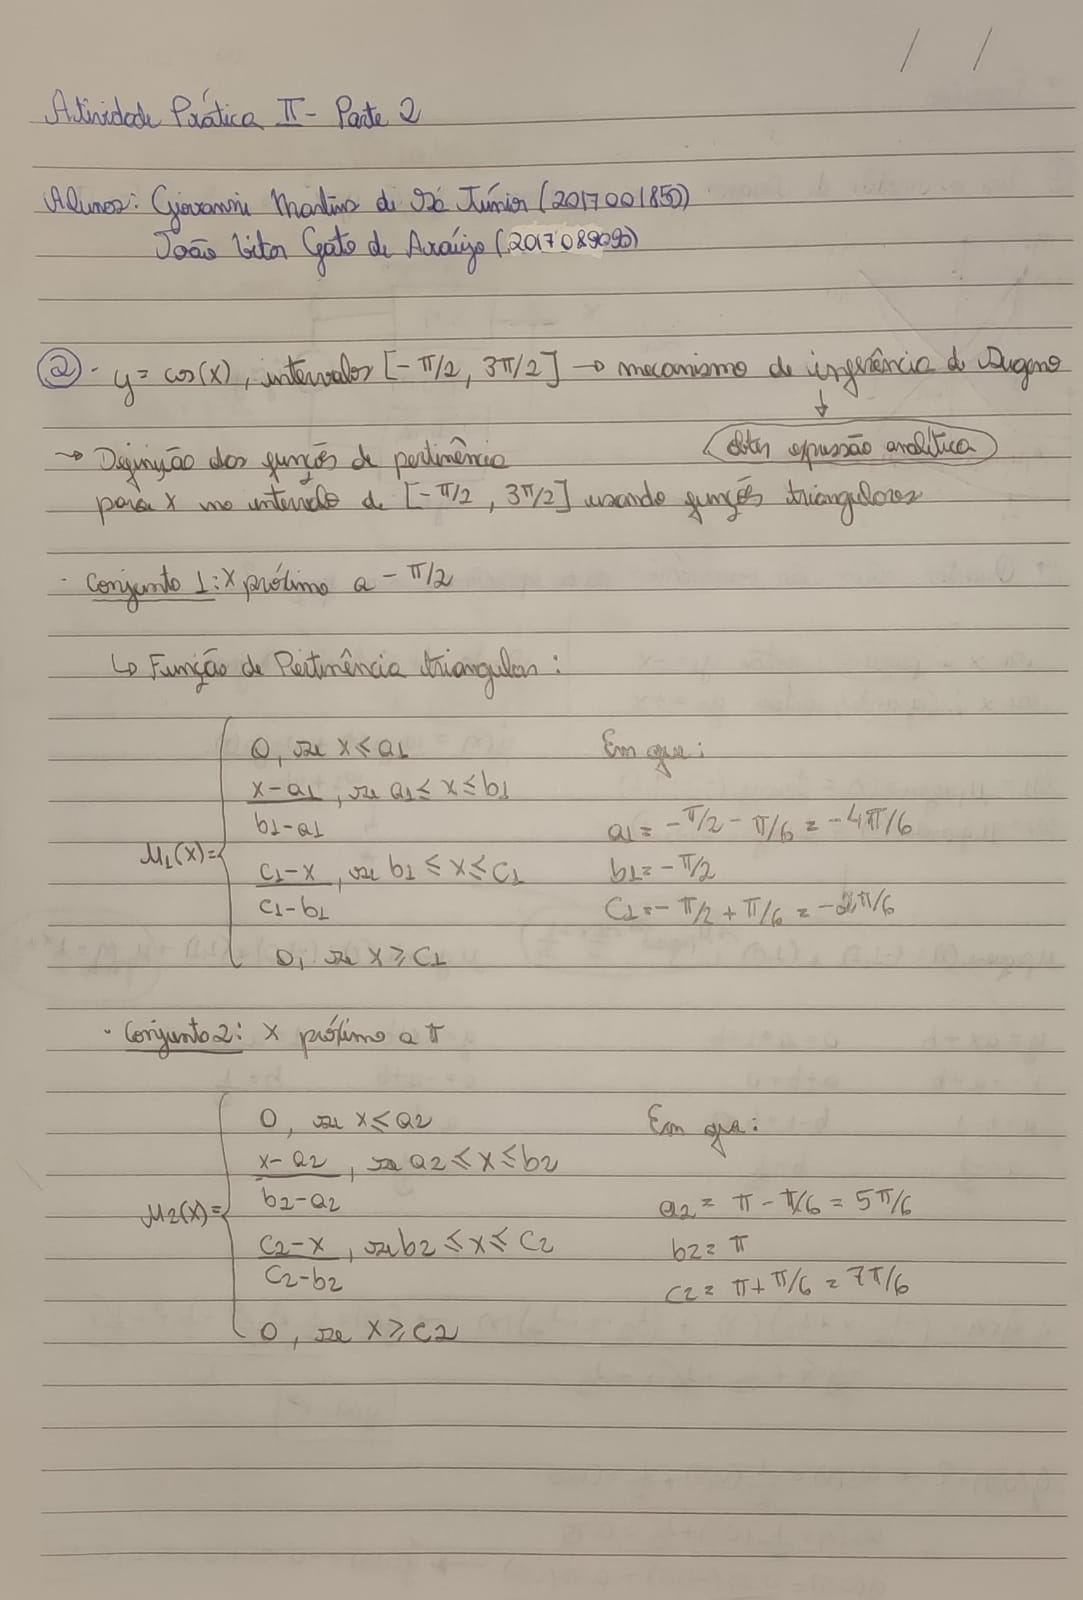

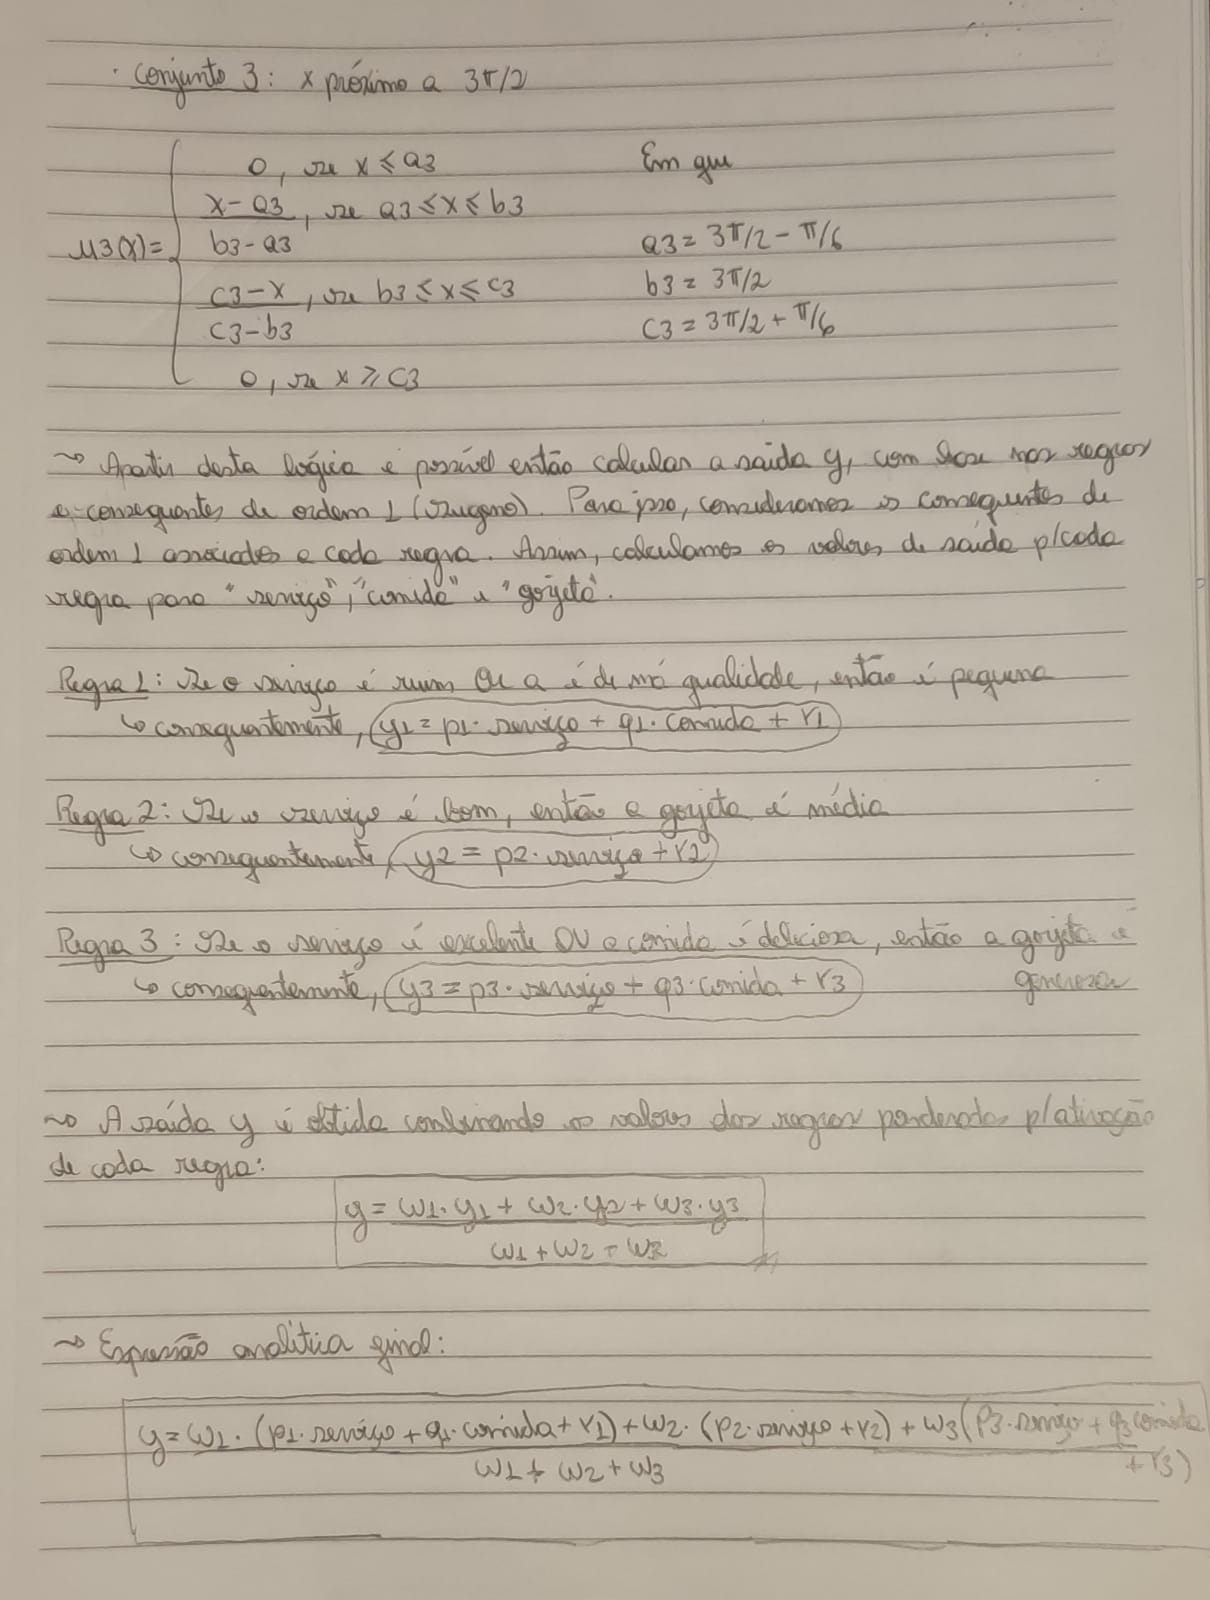

####**3.** Escreva um script em Python para aproximar a função y = seno(x), para x definido no intervalo de [0, 2π], empregando o mecanismo de inferência de Sugeno com consequentes de ordem 1, yj = pjx + qj , onde j é o índice que representa a regra.

* Experimento 1: use 3 regras e funções de pertinência do tipo Triangular para "fuzzificação" da variável x.  
* Experimento 2: use 3 regras e funções de pertinência do tipo Gaussiana para "fuzzificação" da variável x.
* Experimento 3: modifique a quantidade de regras 3, 5, 10 e veja o que acontece com a saída do sistema.

#### Para todos os experimentos, mostre os gráficos resultados das aproximações e calcule o Erro Quadrático Médio EQM onde yi é a saída real da função e y_hat é a saída obtida pelo sistema nebuloso.




###**Experimento 1: use 3 regras e funções de pertinência do tipo Triangular para "fuzzificação da variável x."**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Função de pertinência triangular
def triangular(x, a, b, c):
    return max(0, min((x - a) / (b - a), (c - x) / (c - b)))

# Defina a função de mapeamento
def fuzzy_rule(x, j):
    if j == 0:
        a, b, c = 0, np.pi / 2, np.pi
    elif j == 1:
        a, b, c = np.pi / 2, np.pi, 3 * np.pi / 2
    elif j == 2:
        a, b, c = np.pi, 3 * np.pi / 2, 2 * np.pi
    return triangular(x, a, b, c)

# Função de pertinência do consequente (y = px + q)
def consequent(x, p, q):
    return p * x + q

# Parâmetros das regras (p e q)
p_values = [0.7, 1.0, 0.4]
q_values = [0.0, 0.0, 0.0]

# Intervalo [0, 2*pi]
x = np.linspace(0, 2 * np.pi, 100)
y_real = np.sin(x)
y_approx = np.zeros_like(x)

# Calcula a saída aproximada
for i in range(len(x)):
    outputs = [fuzzy_rule(x[i], j) for j in range(3)]
    y_approx[i] = sum([consequent(x[i], p_values[j], q_values[j]) * outputs[j] for j in range(3)]) / sum(outputs)

# Calcula o Erro Quadrático Médio (EQM)
eqm = np.mean((y_real - y_approx) ** 2)

<ipython-input-4-f3e827b6b5c4>:34: RuntimeWarning: invalid value encountered in double_scalars
  y_approx[i] = sum([consequent(x[i], p_values[j], q_values[j]) * outputs[j] for j in range(3)]) / sum(outputs)


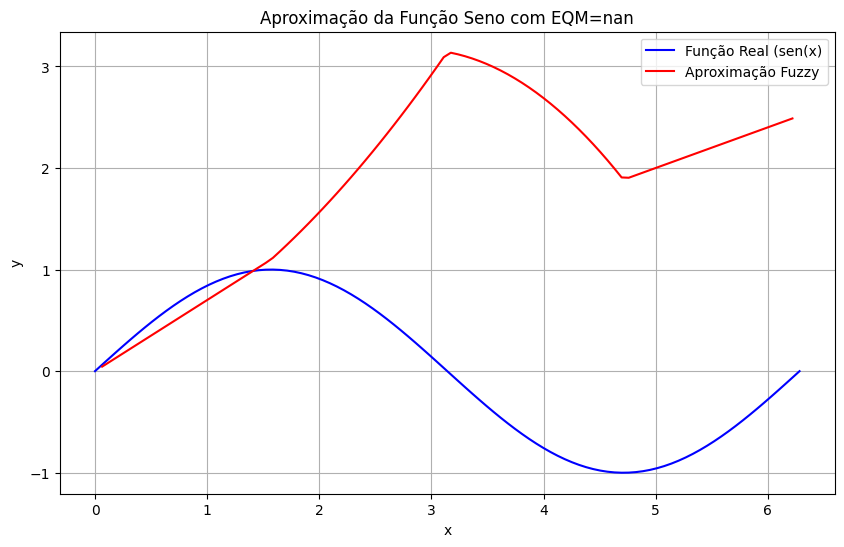

In [5]:
# Plotagem dos gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Função Real (sen(x)', color='blue')
plt.plot(x, y_approx, label='Aproximação Fuzzy', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximação da Função Seno com EQM={eqm:.4f}')
plt.legend()
plt.grid(True)
plt.show()

###**Experimento 2: use 3 regras e funções de pertinência do tipo Gaussiana para "fuzzificação" da variável x.**

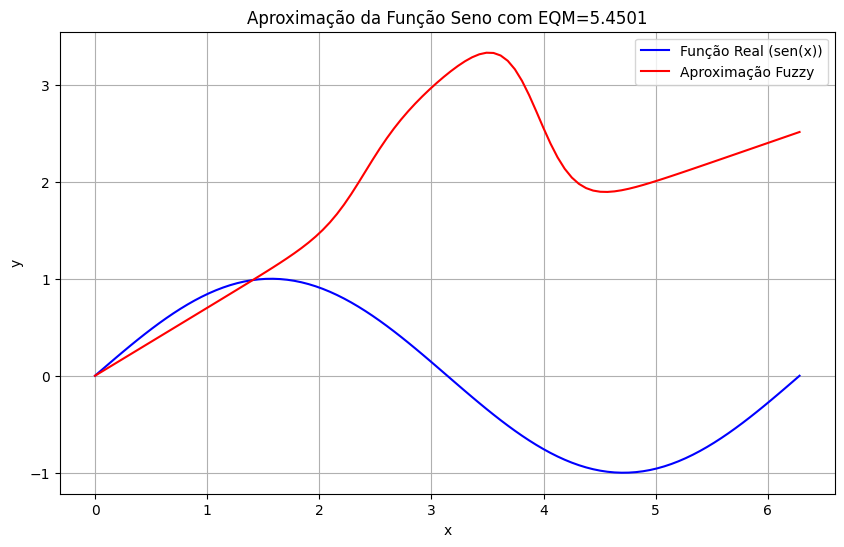

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função de pertinência Gaussiana
def gaussian(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Defina a função de mapeamento
def fuzzy_rule(x, j):
    if j == 0:
        mean = np.pi / 2
    elif j == 1:
        mean = np.pi
    elif j == 2:
        mean = 3 * np.pi / 2
    sigma = np.pi / 6  # Ajuste o valor de sigma conforme necessário
    return gaussian(x, mean, sigma)

# Função de pertinência do consequente (y = px + q)
def consequent(x, p, q):
    return p * x + q

# Parâmetros das regras (p e q)
p_values = [0.7, 1.0, 0.4]
q_values = [0.0, 0.0, 0.0]

# Intervalo [0, 2*pi]
x = np.linspace(0, 2 * np.pi, 100)
y_real = np.sin(x)
y_approx = np.zeros_like(x)

# Calcula a saída aproximada
for i in range(len(x)):
    outputs = [fuzzy_rule(x[i], j) for j in range(3)]
    y_approx[i] = sum([consequent(x[i], p_values[j], q_values[j]) * outputs[j] for j in range(3)]) / sum(outputs)

# Calcula o Erro Quadrático Médio (EQM)
eqm = np.mean((y_real - y_approx) ** 2)

# Plotagem dos gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Função Real (sen(x))', color='blue')
plt.plot(x, y_approx, label='Aproximação Fuzzy', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximação da Função Seno com EQM={eqm:.4f}')
plt.legend()
plt.grid(True)
plt.show()


###**Experimento 3: modifique a quantidade de regras 3, 5, 10 e veja o que acontece com a saída do sistema.**

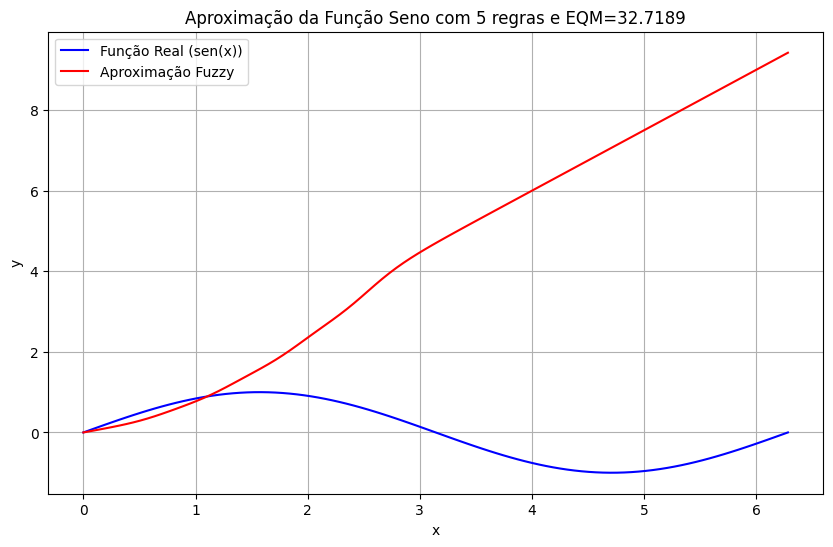

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Função de pertinência Gaussiana
def gaussian(x, mean, sigma):
    return np.exp(-((x - mean) ** 2) / (2 * sigma ** 2))

# Defina a função de mapeamento
def fuzzy_rule(x, j, num_rules):
    mean = (2 * j + 1) * np.pi / (2 * num_rules)
    sigma = np.pi / (2 * num_rules)  # Ajuste o valor de sigma conforme necessário
    return gaussian(x, mean, sigma)

# Função de pertinência do consequente (y = px + q)
def consequent(x, p, q):
    return p * x + q

# Parâmetros das regras (p e q)
num_rules = 5  # Altere o número de regras aqui
p_values = np.linspace(0.5, 1.5, num_rules)
q_values = np.zeros(num_rules)

# Intervalo [0, 2*pi]
x = np.linspace(0, 2 * np.pi, 100)
y_real = np.sin(x)
y_approx = np.zeros_like(x)

# Calcula a saída aproximada
for i in range(len(x)):
    outputs = [fuzzy_rule(x[i], j, num_rules) for j in range(num_rules)]
    y_approx[i] = sum([consequent(x[i], p_values[j], q_values[j]) * outputs[j] for j in range(num_rules)]) / sum(outputs)

# Calcula o Erro Quadrático Médio (EQM)
eqm = np.mean((y_real - y_approx) ** 2)

# Plotagem dos gráficos
plt.figure(figsize=(10, 6))
plt.plot(x, y_real, label='Função Real (sen(x))', color='blue')
plt.plot(x, y_approx, label='Aproximação Fuzzy', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Aproximação da Função Seno com {num_rules} regras e EQM={eqm:.4f}')
plt.legend()
plt.grid(True)
plt.show()


####**4.** Problema da Gorjeta: Considere as regras de ouro da gorjeta as quais foram construídas segundo a experiência dos clientes ao longo dos anos nos restaurantes americanos:

* Se o serviço é ruim ou a comida é de má qualidade, então a gorjeta é pequena.
* Se o serviço é bom, então a gorjeta é média.
* Se o serviço é excelente ou a comida é deliciosa, então a gorjeta é generosa.

####Assuma que uma gorjeta média equivale a 15% do valor da conta, uma gorjeta generosa equivale a 25% e uma gorjeta pequena equivale a 5%. A variável de saída, gorjeta, deve ter a seguinte aparência:

#### Com base nessas informações, escreva um script em MatLab para projetar um sistema nebuloso que modela o relacionamento entre as variáveis serviço, comida e gorjeta. Use o mecanismo de inferência de Sugeno com consequentes de ordem 1, yj = pjx + qj , onde j é o índice que representa a regra. Mostre o gráfico da aproximação resultante.

In [ ]:
# Importação de Bibliotecas
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [ ]:
# Crie as variáveis do problema: serviço, comida e gorjeta
servico = ctrl.Antecedent(np.linspace(0, 10, 101), 'servico')
comida = ctrl.Antecedent(np.linspace(0, 10, 101), 'comida')
gorjeta = ctrl.Consequent(np.linspace(0, 30, 301), 'gorjeta')

# Defina as funções de pertinência para as variáveis de entrada
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['bom'] = fuzz.trimf(servico.universe, [0, 5, 10])
servico['excelente'] = fuzz.trimf(servico.universe, [5, 10, 10])

comida['ruim'] = fuzz.trimf(comida.universe, [0, 0, 5])
comida['deliciosa'] = fuzz.trimf(comida.universe, [5, 10, 10])

In [ ]:
# Defina as funções de pertinência para a variável de saída (gorjeta)
gorjeta['pequena'] = fuzz.trimf(gorjeta.universe, [0, 0, 15])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [0, 15, 30])
gorjeta['generosa'] = fuzz.trimf(gorjeta.universe, [15, 30, 30])

# Defina as regras baseadas nas regras de ouro da gorjeta
regra1 = ctrl.Rule(servico['ruim'] | comida['ruim'], gorjeta['pequena'])
regra2 = ctrl.Rule(servico['bom'], gorjeta['media'])
regra3 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['generosa'])


In [ ]:
# Crie o sistema de controle
sistema_controle = ctrl.ControlSystem([regra1, regra2, regra3])

In [ ]:
# Simule o sistema com entradas específicas
sistema = ctrl.ControlSystemSimulation(sistema_controle)
sistema.input['servico'] = 7.5  # Exemplo: serviço bom
sistema.input['comida'] = 9.0    # Exemplo: comida deliciosa
sistema.compute()

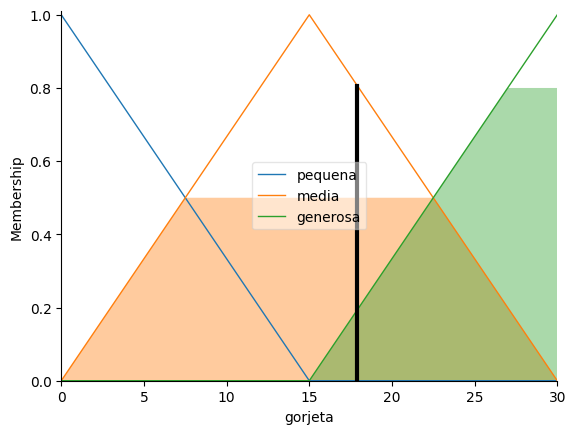

In [ ]:
# Mostre o gráfico da saída
gorjeta.view(sim=sistema)

plt.show()